# TP4 CIENCIA DE DATOS 

#### Integrantes: Vollert, Matticoli, Dillon (T2 - 6)

### **PARTE 1**: Analizando la base

In [1]:
#importamos las librerias necesarias para hacer el tp
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

**EJERCICIO 1**: Exploren el diseño de registro de la base de hogar: a priori, ¿qué variables creen pueden ser predictivas de la desocupación y seria útil incluir para perfeccionar el ejercicio del TP3? Mencionen estas variables y justifiquen su elección - **DESARROLLADO EN EL INFORME**


**EJERCICIO 2**: Descarguen la base de microdatos de la EPH correspondiente al primer trimestre de 2004 y 2024 en formato .dta y .xls, respectivamente. La base de hogares se llama Hogar_t104.dta y usu_hogar_T124.xls, respectivamente. Eliminen todas las observaciones que no corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos Aires y unan ambos trimestres en una sola base. Esto es, a la base de la encuesta individual de cada año (que usaron en el TP3) unan la base de la encuesta de hogar. Asegúrese de estar usando las variables CODUSU y NRO_Hogar para el merge.

In [2]:
#PARTE 1: DESCARGAMOS LA BASE DEL TP3

In [3]:
#en primer lugar, descargamos la base de datos usada en el TP3 para usar en este analisis
#usamos el siguiente codigo: df_limpio2.to_csv('/Users/micavollert/Downloads/TP3/base_tp3.csv', index=False)

#importamos la base de datos: 
path_file_mica_basetp3 = '/Users/micavollert/Downloads/TP4 - CD/base_tp3.csv'
#path_file_juani_basetp3
#path_file_sofi_basetp3 = "/Users/sofiadillon/Desktop/Ciencia de datos tutoriales/TP4/base_tp3.csv"

In [5]:
#armamos un dataframe
individual = pd.read_csv(path_file_mica_basetp3)
display(individual)

#dividimos la base por año
individual_2004 = individual[individual['ano4'] == 2004]
individual_2024 = individual[individual['ano4'] == 2024]

/var/folders/c2/gtbjsyt14vqbtkzmxnc_htwr0000gn/T/ipykernel_53314/1194041376.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  individual = pd.read_csv(path_file_mica_basetp3)


,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,itf,decifr,rdecifr,gdecifr,adecifr,ipcf,deccfr,rdeccfr,gdeccfr,adeccfr
0,125098,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1299.0,...,368.0,2,2,2.0,1,368.0,7,6,6.0,4
1,125397,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,2018.0,...,0.0,0,0,0.0,0,0.0,0,0,0.0,0
2,125515,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1486.0,...,440.0,3,3,3.0,2,440.0,7,7,7.0,5
3,125558,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1674.0,...,2130.0,9,9,9.0,8,532.5,8,8,8.0,6
4,125558,1.0,2.0,1.0,2004.0,1.0,1.0,S,32.0,1674.0,...,2130.0,9,9,9.0,8,532.5,8,8,8.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13178,TQRMNORWVHLKOPCDEIIAD00861660,1.0,4.0,1.0,2024.0,1.0,1.0,S,32.0,590.0,...,0.0,12,12,12.0,12,0.0,12,12,12.0,12
13179,TQRMNORWVHLKOPCDEIIAD00861660,1.0,5.0,1.0,2024.0,1.0,1.0,S,32.0,590.0,...,0.0,12,12,12.0,12,0.0,12,12,12.0,12
13180,TQRMNORWVHLKOPCDEIIAD00861660,1.0,6.0,1.0,2024.0,1.0,1.0,S,32.0,590.0,...,0.0,12,12,12.0,12,0.0,12,12,12.0,12
13181,TQRMNOPSYHJLOQCDEIIAD00794774,1.0,1.0,1.0,2024.0,1.0,1.0,S,32.0,1376.0,...,910000.0,8,8,8.0,7,910000.0,10,10,10.0,10


In [5]:
#PARTE 2: DESCARGAMOS LAS BASES DE DATOS DE EPH

In [7]:
#HOGAR 2004 (DTA)

path_file_mica_DTA = '/Users/micavollert/Downloads/TP4 - CD/Hogar_t104.dta'
#path_file_juani_DTA = 
#path_file_sofi_DTA = "/Users/sofiadillon/Desktop/Ciencia de datos tutoriales/TP4/hogar_t104.dta"a"

In [9]:
#cargar el archivo de 2004 en formato .dta
hogar_2004, meta_2004 = pyreadstat.read_dta(path_file_mica_DTA)
display(hogar_2004)

,CODUSU,nro_hogar,realizada,ano4,trimestre,region,mas_500,aglomerado,pondera,iv1,...,gdeccfr,pdeccfr,adeccfr,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4,idimph
0,125051,1.0,1.0,2004.0,1.0,43.0,S,2.0,355.0,1.0,...,01,,01,1.0,0.0,3.0,0.0,0.0,0.0,00000
1,125082,1.0,1.0,2004.0,1.0,43.0,S,2.0,306.0,1.0,...,03,,02,2.0,0.0,98.0,0.0,0.0,0.0,10000
2,125181,1.0,1.0,2004.0,1.0,43.0,S,2.0,541.0,1.0,...,09,,09,2.0,0.0,1.0,3.0,0.0,0.0,00000
3,125283,1.0,1.0,2004.0,1.0,43.0,S,2.0,255.0,1.0,...,07,,07,1.0,2.0,3.0,4.0,0.0,0.0,10000
4,126192,1.0,1.0,2004.0,1.0,43.0,S,2.0,218.0,1.0,...,08,,08,2.0,0.0,97.0,0.0,0.0,0.0,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12811,283186,1.0,1.0,2004.0,1.0,43.0,N,36.0,272.0,1.0,...,,04,03,1.0,0.0,98.0,0.0,0.0,0.0,00000
12812,284685,1.0,1.0,2004.0,1.0,43.0,N,36.0,397.0,1.0,...,,05,04,2.0,0.0,98.0,0.0,0.0,0.0,00000
12813,285584,1.0,1.0,2004.0,1.0,43.0,N,36.0,130.0,1.0,...,,09,09,97.0,0.0,98.0,0.0,0.0,0.0,00100
12814,287302,2.0,1.0,2004.0,1.0,43.0,N,36.0,153.0,1.0,...,,02,02,2.0,0.0,6.0,0.0,0.0,0.0,00000


In [11]:
#HOGAR 2024 (XSL)

path_file_mica_XLS = '/Users/micavollert/Downloads/TP4 - CD/usu_hogar_T124.xlsx'
#path_file_juani_XLS = 
#path_file_sofi_XLS = "/Users/sofiadillon/Desktop/Ciencia de datos tutoriales/TP4/usu_hogar_T124.xlsx"

In [13]:
#cargar el archivo de 2024 en formato .xls
hogar_2024 = pd.read_excel(path_file_mica_XLS, engine='openpyxl')
display(hogar_2024)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNORPSHLOLMCDEFNFF00852337,2024,1,1,1,41,N,7,179,1,...,NaN,5.0,5,212,1,2,98,0,0,0
1,TQRMNOPRYHKOKTCDEFNFF00856789,2024,1,1,1,41,N,7,313,1,...,NaN,12.0,12,0,1,0,2,0,0,0
2,TQTMNORRSHKOKTCDEFNFF00856790,2024,1,1,1,41,N,7,286,1,...,NaN,8.0,9,401,2,0,1,0,0,0
3,TQRMNORRSHKOKTCDEFNFF00856791,2024,1,1,1,41,N,7,306,1,...,NaN,5.0,6,438,2,0,3,0,0,0
4,TQRMNOQTVHKLLLCDEFNFF00856792,2024,1,1,1,41,N,7,361,1,...,NaN,6.0,7,831,1,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,TQRMNOPXXHLKKUCDEFNFF00852324,2024,1,1,1,41,N,7,336,2,...,NaN,12.0,12,0,96,0,2,3,0,0
16100,TQRMNOPQTHKMLMCDEHMHF00861771,2024,1,1,1,42,N,26,141,1,...,NaN,3.0,2,156,97,0,1,2,0,0
16101,TQRMNOSYXHMMLNCDEFNFF00798999,2024,1,1,1,41,N,7,305,1,...,NaN,1.0,1,353,2,0,1,3,4,0
16102,TQRMNOPTSHLOLQCDEFNFF00852331,2024,1,1,1,41,N,7,331,1,...,NaN,6.0,7,420,97,0,98,0,0,0


In [10]:
#PARTE 3: ELIMINAR OBSERVACIONES QUE NO CORRESPONDEN A LOS ANGLOMERADOS DE CABA Y GBA

In [15]:
#buscamos los codigos de aglomerados en el diccionario de variables “Diseño de registro y estructura para las bases preliminares" 
#32 = Ciudad Autonoma de Buenos Aires (CABA)
#33 = Partidos del GBA

aglomerados_caba_gba = [32, 33]
hogar_2004 = hogar_2004[hogar_2004['aglomerado'].isin(aglomerados_caba_gba)]
hogar_2024 = hogar_2024[hogar_2024['AGLOMERADO'].isin(aglomerados_caba_gba)]

In [12]:
#PARTE 4: UNIMOS LAS BASES DE DATOS POR AÑO

In [17]:
#1. unimos las bases de datos de 2004
#antes de unir las bases de datos, nos aseguramos de que las columnas tengan los mismos nombres y en el mismo formato. para eso, transformamos todas las variables a minuscula
individual_2004.columns = individual_2004.columns.str.lower()
hogar_2004.columns = hogar_2004.columns.str.lower()

#unimos cada base de encuesta individual con su respectiva base de hogares
df_2004 = pd.merge(individual_2004, hogar_2004, on=['codusu', 'nro_hogar'], how='inner')
display(df_2004)

,codusu,nro_hogar,componente,h15,ano4_x,trimestre_x,region_x,mas_500_x,aglomerado_x,pondera_x,...,gdeccfr_y,pdeccfr,adeccfr_y,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4,idimph
0,191288,1.0,1.0,1.0,2004.0,1.0,1.0,S,33.0,1450.0,...,07,,08,2.0,0.0,98.0,0.0,0.0,0.0,00000
1,191288,1.0,2.0,1.0,2004.0,1.0,1.0,S,33.0,1450.0,...,07,,08,2.0,0.0,98.0,0.0,0.0,0.0,00000
2,191433,1.0,1.0,1.0,2004.0,1.0,1.0,S,33.0,1497.0,...,10,,10,1.0,2.0,98.0,0.0,0.0,0.0,00000
3,191433,1.0,2.0,1.0,2004.0,1.0,1.0,S,33.0,1497.0,...,10,,10,1.0,2.0,98.0,0.0,0.0,0.0,00000
4,191582,1.0,1.0,1.0,2004.0,1.0,1.0,S,33.0,1182.0,...,02,,03,2.0,0.0,3.0,4.0,5.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,288171,1.0,3.0,0.0,2004.0,1.0,1.0,S,33.0,1454.0,...,08,,09,96.0,0.0,2.0,0.0,0.0,0.0,00000
3416,288405,1.0,1.0,1.0,2004.0,1.0,1.0,S,33.0,1673.0,...,02,,02,2.0,0.0,98.0,0.0,0.0,0.0,00000
3417,288405,1.0,2.0,1.0,2004.0,1.0,1.0,S,33.0,1673.0,...,02,,02,2.0,0.0,98.0,0.0,0.0,0.0,00000
3418,288405,1.0,3.0,1.0,2004.0,1.0,1.0,S,33.0,1673.0,...,02,,02,2.0,0.0,98.0,0.0,0.0,0.0,00000


In [19]:
#2. unimos las bases de datos de 2024
#antes de unir las bases de datos, nos aseguramos de que las columnas tengan los mismos nombres y en el mismo formato. para eso, transformamos todas las variables a minuscula
individual_2024.columns = individual_2024.columns.str.lower()
hogar_2024.columns = hogar_2024.columns.str.lower()

#unimos cada base de encuesta individual con su respectiva base de hogares
df_2024 = pd.merge(individual_2024, hogar_2024, on=['codusu', 'nro_hogar'], how='inner')
display(df_2024)

,codusu,nro_hogar,componente,h15,ano4_x,trimestre_x,region_x,mas_500_x,aglomerado_x,pondera_x,...,gdeccfr_y,pdeccfr,adeccfr_y,pondih,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4
0,TQRMNOSUWHLKMUCDEIJAH00855260,1.0,1.0,1.0,2024.0,1.0,1.0,S,33.0,1810.0,...,12.0,NaN,12,0,1,0,96,0,0,0
1,TQSMNORWVHLLKQCDEIJAH00856914,1.0,1.0,1.0,2024.0,1.0,1.0,S,33.0,2368.0,...,9.0,NaN,9,3324,1,0,98,0,0,0
2,TQRMNOPTWHJLQRCDEIJAH00795141,1.0,1.0,1.0,2024.0,1.0,1.0,S,33.0,1682.0,...,10.0,NaN,10,2575,1,0,98,0,0,0
3,TQRMNOSTUHMMQTCDEIJAH00802466,1.0,2.0,1.0,2024.0,1.0,1.0,S,33.0,1866.0,...,12.0,NaN,12,0,1,0,98,0,0,0
4,TQRMNOSTUHMMQTCDEIJAH00802466,1.0,3.0,0.0,2024.0,1.0,1.0,S,33.0,1866.0,...,12.0,NaN,12,0,1,0,98,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,TQRMNORWVHLKOPCDEIIAD00861660,1.0,4.0,1.0,2024.0,1.0,1.0,S,32.0,590.0,...,12.0,NaN,12,0,2,1,98,0,0,0
5663,TQRMNORWVHLKOPCDEIIAD00861660,1.0,5.0,1.0,2024.0,1.0,1.0,S,32.0,590.0,...,12.0,NaN,12,0,2,1,98,0,0,0
5664,TQRMNORWVHLKOPCDEIIAD00861660,1.0,6.0,1.0,2024.0,1.0,1.0,S,32.0,590.0,...,12.0,NaN,12,0,2,1,98,0,0,0
5665,TQRMNOPSYHJLOQCDEIIAD00794774,1.0,1.0,1.0,2024.0,1.0,1.0,S,32.0,1376.0,...,10.0,NaN,10,1781,1,0,96,0,0,0


In [15]:
#PARTE 5: UNIMOS LAS BASES DE DATOS EN UNA UNICA BASE

In [21]:
df = pd.concat([df_2004, df_2024])
display(df)

,codusu,nro_hogar,componente,h15,ano4_x,trimestre_x,region_x,mas_500_x,aglomerado_x,pondera_x,...,pdeccfr,adeccfr_y,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4,idimph,pondih
0,191288,1.0,1.0,1.0,2004.0,1.0,1.0,S,33.0,1450.0,...,,08,2.0,0.0,98.0,0.0,0.0,0.0,00000,NaN
1,191288,1.0,2.0,1.0,2004.0,1.0,1.0,S,33.0,1450.0,...,,08,2.0,0.0,98.0,0.0,0.0,0.0,00000,NaN
2,191433,1.0,1.0,1.0,2004.0,1.0,1.0,S,33.0,1497.0,...,,10,1.0,2.0,98.0,0.0,0.0,0.0,00000,NaN
3,191433,1.0,2.0,1.0,2004.0,1.0,1.0,S,33.0,1497.0,...,,10,1.0,2.0,98.0,0.0,0.0,0.0,00000,NaN
4,191582,1.0,1.0,1.0,2004.0,1.0,1.0,S,33.0,1182.0,...,,03,2.0,0.0,3.0,4.0,5.0,0.0,00000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,TQRMNORWVHLKOPCDEIIAD00861660,1.0,4.0,1.0,2024.0,1.0,1.0,S,32.0,590.0,...,NaN,12,2.0,1.0,98.0,0.0,0.0,0.0,NaN,0.0
5663,TQRMNORWVHLKOPCDEIIAD00861660,1.0,5.0,1.0,2024.0,1.0,1.0,S,32.0,590.0,...,NaN,12,2.0,1.0,98.0,0.0,0.0,0.0,NaN,0.0
5664,TQRMNORWVHLKOPCDEIIAD00861660,1.0,6.0,1.0,2024.0,1.0,1.0,S,32.0,590.0,...,NaN,12,2.0,1.0,98.0,0.0,0.0,0.0,NaN,0.0
5665,TQRMNOPSYHJLOQCDEIIAD00794774,1.0,1.0,1.0,2024.0,1.0,1.0,S,32.0,1376.0,...,NaN,10,1.0,0.0,96.0,0.0,0.0,0.0,NaN,1781.0


In [17]:
#base de datos unificada: df
#df.to_csv('/Users/micavollert/Downloads/TP3/base_tp4.csv', index=False) 

**EJERCICIO 3**: Limpien la base de datos tomando criterios que hagan sentido. Explicar cualquier decisión como el tratamiento de valores faltantes (missing values), extremos (outliers), o variables categóricas. Justifique sus decisiones.

In [18]:
#PARTE 1: ELIMINAMOS COLUMNAS CON MUCHOS DATOS FALTANTES (MISSING DATA)

In [23]:
#establecemos un umbral a partir del cual se considera que hay muchos datos faltantes
#umbral: 70%, es decir, si tiene menos del 70% de datos, la columna se elimina 
umbral = 0.7 * len(df)  
df1 = df.dropna(thresh=umbral, axis=1)
display(df1)

,codusu,nro_hogar,componente,h15,ano4_x,trimestre_x,region_x,mas_500_x,aglomerado_x,pondera_x,...,deccfr_y,rdeccfr_y,gdeccfr_y,adeccfr_y,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4
0,191288,1.0,1.0,1.0,2004.0,1.0,1.0,S,33.0,1450.0,...,07,07,07,08,2.0,0.0,98.0,0.0,0.0,0.0
1,191288,1.0,2.0,1.0,2004.0,1.0,1.0,S,33.0,1450.0,...,07,07,07,08,2.0,0.0,98.0,0.0,0.0,0.0
2,191433,1.0,1.0,1.0,2004.0,1.0,1.0,S,33.0,1497.0,...,10,10,10,10,1.0,2.0,98.0,0.0,0.0,0.0
3,191433,1.0,2.0,1.0,2004.0,1.0,1.0,S,33.0,1497.0,...,10,10,10,10,1.0,2.0,98.0,0.0,0.0,0.0
4,191582,1.0,1.0,1.0,2004.0,1.0,1.0,S,33.0,1182.0,...,03,02,02,03,2.0,0.0,3.0,4.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,TQRMNORWVHLKOPCDEIIAD00861660,1.0,4.0,1.0,2024.0,1.0,1.0,S,32.0,590.0,...,12,12,12.0,12,2.0,1.0,98.0,0.0,0.0,0.0
5663,TQRMNORWVHLKOPCDEIIAD00861660,1.0,5.0,1.0,2024.0,1.0,1.0,S,32.0,590.0,...,12,12,12.0,12,2.0,1.0,98.0,0.0,0.0,0.0
5664,TQRMNORWVHLKOPCDEIIAD00861660,1.0,6.0,1.0,2024.0,1.0,1.0,S,32.0,590.0,...,12,12,12.0,12,2.0,1.0,98.0,0.0,0.0,0.0
5665,TQRMNOPSYHJLOQCDEIIAD00794774,1.0,1.0,1.0,2024.0,1.0,1.0,S,32.0,1376.0,...,10,10,10.0,10,1.0,0.0,96.0,0.0,0.0,0.0


In [20]:
#PARTE 2: ELIMINAMOS VARIABLES EN FORMATO STRING 

In [25]:
#la variable CODUSU tiene observaciones en formato string, sin embargo no podemos eliminarla ya que es una variable relevante
#por ende, antes de eliminar todas las columnas con observaciones string, nos aseguramos de tranformar CODUSU en numerica
#creamos un diccionario para mapear cada valor  de CODUSU con un identificador numerico
df1['codusu'] = df1['codusu'].astype('category').cat.codes

/var/folders/c2/gtbjsyt14vqbtkzmxnc_htwr0000gn/T/ipykernel_53314/3745257118.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['codusu'] = df1['codusu'].astype('category').cat.codes


In [27]:
#para luego hacer un analisis estadistico es necesario que las variables esten en formato numerico por eso decidimos eliminar las que estan en formato string
#primero identificamos que columnas estan en formato object 
object_columns = df1.select_dtypes(include=['object']).columns
print("Variables en formato object:", object_columns)
#borramos las variables
df2 = df1.select_dtypes(exclude=['object'])
display(df2)

Variables en formato object: Index(['mas_500_x', 'mas_500_y', 'decifr_y', 'rdecifr_y', 'gdecifr_y',
       'adecifr_y', 'deccfr_y', 'rdeccfr_y', 'gdeccfr_y', 'adeccfr_y'],
      dtype='object')


,codusu,nro_hogar,componente,h15,ano4_x,trimestre_x,region_x,aglomerado_x,pondera_x,ch03,...,ix_men10,ix_mayeq10,itf_y,ipcf_y,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4
0,0,1.0,1.0,1.0,2004.0,1.0,1.0,33.0,1450.0,1.0,...,NaN,2.0,800.0,400.000000,2.0,0.0,98.0,0.0,0.0,0.0
1,0,1.0,2.0,1.0,2004.0,1.0,1.0,33.0,1450.0,2.0,...,NaN,2.0,800.0,400.000000,2.0,0.0,98.0,0.0,0.0,0.0
2,1,1.0,1.0,1.0,2004.0,1.0,1.0,33.0,1497.0,1.0,...,NaN,2.0,2500.0,1250.000000,1.0,2.0,98.0,0.0,0.0,0.0
3,1,1.0,2.0,1.0,2004.0,1.0,1.0,33.0,1497.0,3.0,...,NaN,2.0,2500.0,1250.000000,1.0,2.0,98.0,0.0,0.0,0.0
4,2,1.0,1.0,1.0,2004.0,1.0,1.0,33.0,1182.0,1.0,...,1.0,5.0,770.0,128.333333,2.0,0.0,3.0,4.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,2407,1.0,4.0,1.0,2024.0,1.0,1.0,32.0,590.0,3.0,...,0.0,6.0,0.0,0.000000,2.0,1.0,98.0,0.0,0.0,0.0
5663,2407,1.0,5.0,1.0,2024.0,1.0,1.0,32.0,590.0,3.0,...,0.0,6.0,0.0,0.000000,2.0,1.0,98.0,0.0,0.0,0.0
5664,2407,1.0,6.0,1.0,2024.0,1.0,1.0,32.0,590.0,3.0,...,0.0,6.0,0.0,0.000000,2.0,1.0,98.0,0.0,0.0,0.0
5665,1183,1.0,1.0,1.0,2024.0,1.0,1.0,32.0,1376.0,1.0,...,0.0,1.0,910000.0,910000.000000,1.0,0.0,96.0,0.0,0.0,0.0


In [23]:
#PARTE 3: REEMPLAZAMOS VALORES NAN POR LA MEDIANA

In [29]:
#para aseurarnos de que no hayan quedado valores NaN, reemplazamos todos estos por la mediana 
for col in df2.columns:
    if df2[col].isnull().any():
        median_value = df2[col].median()
        df2[col].fillna(median_value, inplace=True)
display(df2)

/var/folders/c2/gtbjsyt14vqbtkzmxnc_htwr0000gn/T/ipykernel_53314/2308888528.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[col].fillna(median_value, inplace=True)


,codusu,nro_hogar,componente,h15,ano4_x,trimestre_x,region_x,aglomerado_x,pondera_x,ch03,...,ix_men10,ix_mayeq10,itf_y,ipcf_y,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4
0,0,1.0,1.0,1.0,2004.0,1.0,1.0,33.0,1450.0,1.0,...,1.0,2.0,800.0,400.000000,2.0,0.0,98.0,0.0,0.0,0.0
1,0,1.0,2.0,1.0,2004.0,1.0,1.0,33.0,1450.0,2.0,...,1.0,2.0,800.0,400.000000,2.0,0.0,98.0,0.0,0.0,0.0
2,1,1.0,1.0,1.0,2004.0,1.0,1.0,33.0,1497.0,1.0,...,1.0,2.0,2500.0,1250.000000,1.0,2.0,98.0,0.0,0.0,0.0
3,1,1.0,2.0,1.0,2004.0,1.0,1.0,33.0,1497.0,3.0,...,1.0,2.0,2500.0,1250.000000,1.0,2.0,98.0,0.0,0.0,0.0
4,2,1.0,1.0,1.0,2004.0,1.0,1.0,33.0,1182.0,1.0,...,1.0,5.0,770.0,128.333333,2.0,0.0,3.0,4.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,2407,1.0,4.0,1.0,2024.0,1.0,1.0,32.0,590.0,3.0,...,0.0,6.0,0.0,0.000000,2.0,1.0,98.0,0.0,0.0,0.0
5663,2407,1.0,5.0,1.0,2024.0,1.0,1.0,32.0,590.0,3.0,...,0.0,6.0,0.0,0.000000,2.0,1.0,98.0,0.0,0.0,0.0
5664,2407,1.0,6.0,1.0,2024.0,1.0,1.0,32.0,590.0,3.0,...,0.0,6.0,0.0,0.000000,2.0,1.0,98.0,0.0,0.0,0.0
5665,1183,1.0,1.0,1.0,2024.0,1.0,1.0,32.0,1376.0,1.0,...,0.0,1.0,910000.0,910000.000000,1.0,0.0,96.0,0.0,0.0,0.0


In [25]:
#PARTE 4: ELIMINAMOS VALORES OUTLIERS

In [31]:
for col in df2.select_dtypes(include=['float64', 'int64']).columns:
    #calculamos el IQR
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df3 = df2[(df2[col] >= lower_bound) & (df2[col] <= upper_bound)]
display(df3)

,codusu,nro_hogar,componente,h15,ano4_x,trimestre_x,region_x,aglomerado_x,pondera_x,ch03,...,ix_men10,ix_mayeq10,itf_y,ipcf_y,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4
0,0,1.0,1.0,1.0,2004.0,1.0,1.0,33.0,1450.0,1.0,...,1.0,2.0,800.0,400.000000,2.0,0.0,98.0,0.0,0.0,0.0
1,0,1.0,2.0,1.0,2004.0,1.0,1.0,33.0,1450.0,2.0,...,1.0,2.0,800.0,400.000000,2.0,0.0,98.0,0.0,0.0,0.0
2,1,1.0,1.0,1.0,2004.0,1.0,1.0,33.0,1497.0,1.0,...,1.0,2.0,2500.0,1250.000000,1.0,2.0,98.0,0.0,0.0,0.0
3,1,1.0,2.0,1.0,2004.0,1.0,1.0,33.0,1497.0,3.0,...,1.0,2.0,2500.0,1250.000000,1.0,2.0,98.0,0.0,0.0,0.0
4,2,1.0,1.0,1.0,2004.0,1.0,1.0,33.0,1182.0,1.0,...,1.0,5.0,770.0,128.333333,2.0,0.0,3.0,4.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,2407,1.0,4.0,1.0,2024.0,1.0,1.0,32.0,590.0,3.0,...,0.0,6.0,0.0,0.000000,2.0,1.0,98.0,0.0,0.0,0.0
5663,2407,1.0,5.0,1.0,2024.0,1.0,1.0,32.0,590.0,3.0,...,0.0,6.0,0.0,0.000000,2.0,1.0,98.0,0.0,0.0,0.0
5664,2407,1.0,6.0,1.0,2024.0,1.0,1.0,32.0,590.0,3.0,...,0.0,6.0,0.0,0.000000,2.0,1.0,98.0,0.0,0.0,0.0
5665,1183,1.0,1.0,1.0,2024.0,1.0,1.0,32.0,1376.0,1.0,...,0.0,1.0,910000.0,910000.000000,1.0,0.0,96.0,0.0,0.0,0.0


In [27]:
#base de datos limpia: df3
#df3.to_csv('/Users/micavollert/Downloads/TP3/base_tp4_limpia.csv', index=False) 

**Ejercicio 4**: Construya variables (mínimo 3) que no estén en la base pero que sean relevantes para predecir individuos desocupados (por ejemplo, la proporción de personas que trabajan en el hogar).

In [33]:
#creamos una nueva base de datos, df4, en donde vamos a incluir las nuevas variables
df4 = df3.copy()

#VARIABLE 1: proporcion de personas ocupadas en el hogar, es decir, proporcion de personas del hogar que trabajan
#referencia:
#CODUSU es un identificador asignado a cada vivienda, es decir, cada hogar dentro de una vivienda tiene el mismo valor de CODUSU
#ESTADO indica la situación laboral de cada persona. 1: ocupado, 2: desocupado, 3: inactivo, 4: menor de 10 años (no en edad de trabajar)
df4['ocupados'] = df4.groupby('codusu')['estado'].transform(lambda x: (x == 1).mean()) #calcula la prop de personas ocupadas (ESTADO == 1) en el hogar


#VARIABLE 2: proporcion de personas en el hogar que son dependientes, ya sea por estar inactivos o por ser menores
df4['dependientes'] = df4.groupby('codusu')['estado'].transform(lambda x: ((x == 3) | (x == 4)).mean()) #calcula la prop de miembros en el hogar que son inactivos (ESTADO == 3) o menores de 10 años (ESTADO == 4)
#referencia:
#CODUSU es un identificador asignado a cada vivienda, es decir, cada hogar dentro de una vivienda tiene el mismo valor de CODUSU
#ESTADO indica la situación laboral de cada persona. 1: ocupado, 2: desocupado, 3: inactivo, 4: menor de 10 años (no en edad de trabajar)


#VARIABLE 3: ingreso per capita familiar
#referencia: 
#itf_y: representa el ingreso total familiar
#ix_tot: representa la cantidad total de miembros en el hogar
df4['ingreso_per_capita'] = df4['itf_y'] / df4['ix_tot']

display(df4)

,codusu,nro_hogar,componente,h15,ano4_x,trimestre_x,region_x,aglomerado_x,pondera_x,ch03,...,ipcf_y,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4,ocupados,dependientes,ingreso_per_capita
0,0,1.0,1.0,1.0,2004.0,1.0,1.0,33.0,1450.0,1.0,...,400.000000,2.0,0.0,98.0,0.0,0.0,0.0,0.500000,0.500000,400.000000
1,0,1.0,2.0,1.0,2004.0,1.0,1.0,33.0,1450.0,2.0,...,400.000000,2.0,0.0,98.0,0.0,0.0,0.0,0.500000,0.500000,400.000000
2,1,1.0,1.0,1.0,2004.0,1.0,1.0,33.0,1497.0,1.0,...,1250.000000,1.0,2.0,98.0,0.0,0.0,0.0,1.000000,0.000000,1250.000000
3,1,1.0,2.0,1.0,2004.0,1.0,1.0,33.0,1497.0,3.0,...,1250.000000,1.0,2.0,98.0,0.0,0.0,0.0,1.000000,0.000000,1250.000000
4,2,1.0,1.0,1.0,2004.0,1.0,1.0,33.0,1182.0,1.0,...,128.333333,2.0,0.0,3.0,4.0,5.0,0.0,0.333333,0.666667,128.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,2407,1.0,4.0,1.0,2024.0,1.0,1.0,32.0,590.0,3.0,...,0.000000,2.0,1.0,98.0,0.0,0.0,0.0,0.400000,0.600000,0.000000
5663,2407,1.0,5.0,1.0,2024.0,1.0,1.0,32.0,590.0,3.0,...,0.000000,2.0,1.0,98.0,0.0,0.0,0.0,0.400000,0.600000,0.000000
5664,2407,1.0,6.0,1.0,2024.0,1.0,1.0,32.0,590.0,3.0,...,0.000000,2.0,1.0,98.0,0.0,0.0,0.0,0.400000,0.600000,0.000000
5665,1183,1.0,1.0,1.0,2024.0,1.0,1.0,32.0,1376.0,1.0,...,910000.000000,1.0,0.0,96.0,0.0,0.0,0.0,1.000000,0.000000,910000.000000


**Ejercicio 5**: Presenten estadísticas descriptivas de tres variables de la encuesta de hogar que ustedes creen que pueden ser relevantes para predecir la desocupación. Comenten las estadísticas obtenidas.

In [35]:
#seleccionamos las variables significativas para predecir la desocupacion
variables_relevantes_desocupacion = ['itf_y', 'ix_tot', 'nivel_ed']
#itf_y: representa el ingreso total familiar
#ix_tot: representa la cantidad total de miembros en el hogar
#nivel_ed_ representa el nivel educativo promedio del hogar

#calculamos las estadisticas descriptivas
estadisticas_descriptivas = df4[variables_relevantes_desocupacion].describe()
print("Estadísticas descriptivas de variables relevantes para desocupación:")
print(estadisticas_descriptivas)

#COMENTARIOS 
# - El ingreso familiar tiene una distribución muy desigual. Aunque la mayoría de los hogares tiene ingresos bajos (con una mediana de 1,656), hay una pequeña proporcion de hogares con ingresos muy altos (cerca de 350,000 o más).
# - El tamaño de los hogares es relativamente homogéneo, con una media de alrededor de 4 miembros
# - El nivel educativo promedio del hogar sugiere que la mayoría de los hogares tienen educación secundaria o terciaria incompleta. Hay hogares con niveles educativos más bajos (primarios incompletos) y otros con niveles más altos (terciarios o universitarios completos)

Estadísticas descriptivas de variables relevantes para desocupación:
              itf_y       ix_tot     nivel_ed
count  9.050000e+03  9050.000000  9050.000000
mean   3.489787e+05     4.035028     3.512928
std    9.732592e+05     2.054617     1.827788
min    0.000000e+00     1.000000     1.000000
25%    3.500000e+02     3.000000     2.000000
50%    1.656000e+03     4.000000     3.000000
75%    4.450000e+05     5.000000     5.000000
max    3.393700e+07    15.000000     7.000000


### **PARTE 2**: Clasificación y regularización

**Ejercicio 1**: Para cada año, partan la base respondieron en una base de prueba y una de entrenamiento (X_train, y_train, X_test, y_test) utilizando el comando train_test_split. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (random state instance) debe ser 101. Establezca a desocupado como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables serán las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [37]:
#base de datos a usar: df4

#guardamos como una base distinta llamada respondieron las observaciones donde respondieron la pregunta sobre su condición de actividad (ESTADO)
#ESTADO diferente de 0
# Filtrar a quienes respondieron la pregunta sobre condición de actividad
respondieron = df4[df4['estado'] != 0]

#imprimimos los nombres de todas las columnas para identificar la variable de año
print(respondieron.columns)

#filtramos columnas que contengan la palabra "ano"
print([col for col in respondieron.columns if 'ano' in col])

#visualizamos los datos que contienen cada variable
print(respondieron[['ano4_x', 'ano4_y']].head())
#Parece que ambas tienen datos de 2004

#verificamos si alguna columna tiene valores de 2024
print(respondieron['ano4_x'].unique())
print(respondieron['ano4_y'].unique())
#dado que tanto ano4_x como ano4_y contienen tanto 2004 como 2024, es posible que ambas columnas representen los miso datos pero hubo un error en agregar
#ambas en el merge.

#eliminamos la columna 'ano4_y' y nos quedamos con "ano4_x" 
respondieron.drop(columns=['ano4_y'], inplace=True)

Index(['codusu', 'nro_hogar', 'componente', 'h15', 'ano4_x', 'trimestre_x',
       'region_x', 'aglomerado_x', 'pondera_x', 'ch03',
       ...
       'ipcf_y', 'vii1_1', 'vii1_2', 'vii2_1', 'vii2_2', 'vii2_3', 'vii2_4',
       'ocupados', 'dependientes', 'ingreso_per_capita'],
      dtype='object', length=140)
['ano4_x', 'ano4_y']
   ano4_x  ano4_y
0  2004.0  2004.0
1  2004.0  2004.0
2  2004.0  2004.0
3  2004.0  2004.0
4  2004.0  2004.0
[2004. 2024.]
[2004. 2024.]


In [39]:
#filtramos los datos por años 2004 y 2024
respondieron_2004 = respondieron[respondieron['ano4_x'] == 2004]
respondieron_2024 = respondieron[respondieron['ano4_x'] == 2024]

#agregamos una columna llamada DESOCUPADO que tome 1 si la persona está desocupada
#creamos la columna 'desocupado' en ambas bases de datos, usando la variable 'estado'
respondieron_2004['desocupado'] = respondieron_2004['estado'].apply(lambda x: 1 if x == 2 else 0) # Desocupado: estado == 2
respondieron_2024['desocupado'] = respondieron_2024['estado'].apply(lambda x: 1 if x == 2 else 0) # Desocupado: estado == 2

/var/folders/c2/gtbjsyt14vqbtkzmxnc_htwr0000gn/T/ipykernel_53314/516948019.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron_2004['desocupado'] = respondieron_2004['estado'].apply(lambda x: 1 if x == 2 else 0) # Desocupado: estado == 2
/var/folders/c2/gtbjsyt14vqbtkzmxnc_htwr0000gn/T/ipykernel_53314/516948019.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron_2024['desocupado'] = respondieron_2024['estado'].apply(lambda x: 1 if x == 2 else 0) # Desocupado: estado == 2


In [41]:
#AÑO 2004
#partimos la base respondieron_2004 en una base de prueba y una de entrenamiento

#establecemos la variable dependiente (y) y las variables independientes (X)
y_2004 = respondieron_2004['desocupado']  # Variable dependiente
X_2004 = respondieron_2004.drop(columns=['desocupado', 'ano4_x'])  #eliminamos la columna 'desocupado' y 'ano_x' de las independientes

#agregamos la columna de unos para el término independiente
X_2004.insert(0, 'Intercepto', 1)

#division de la base de datos en entrenamiento y prueba (70% / 30%) con semilla 101
X_train_2004, X_test_2004, y_train_2004, y_test_2004 = train_test_split(X_2004, y_2004, test_size=0.3, random_state=101)

#verificamos las dimensiones de las divisiones
print(f"Tamaño de X_train_2004: {X_train_2004.shape}")
print(f"Tamaño de X_test_2004: {X_test_2004.shape}")
print(f"Tamaño de y_train_2004: {y_train_2004.shape}")
print(f"Tamaño de y_test_2004: {y_test_2004.shape}")


Tamaño de X_train_2004: (2394, 139)
Tamaño de X_test_2004: (1026, 139)
Tamaño de y_train_2004: (2394,)
Tamaño de y_test_2004: (1026,)


In [43]:
#AÑO 2024
#partimos la base respondieron_2024 en una base de prueba y una de entrenamiento

# Establecer la variable dependiente (y) y las variables independientes (X)
y_2024 = respondieron_2024['desocupado']  # Variable dependiente
X_2024 = respondieron_2024.drop(columns=['desocupado', 'ano4_x'])  # Eliminar la columna 'desocupado' y 'ano_x' de las independientes

# Agregar la columna de unos para el término independiente
X_2024.insert(0, 'Intercepto', 1)

# División de la base de datos en entrenamiento y prueba (70% / 30%) con semilla 101
X_train_2024, X_test_2024, y_train_2024, y_test_2024 = train_test_split(X_2024, y_2024, test_size=0.3, random_state=101)

# Verificar las dimensiones de las divisiones
print(f"Tamaño de X_train_2024: {X_train_2024.shape}")
print(f"Tamaño de X_test_2024: {X_test_2024.shape}")
print(f"Tamaño de y_train_2024: {y_train_2024.shape}")
print(f"Tamaño de y_test_2024: {y_test_2024.shape}")


Tamaño de X_train_2024: (3941, 139)
Tamaño de X_test_2024: (1689, 139)
Tamaño de y_train_2024: (3941,)
Tamaño de y_test_2024: (1689,)


**Ejercicio 2:** Expliquen brevemente cómo elegirían λ por validación cruzada (en Python es alpha). Detallen por qué no usarían el conjunto de prueba (test) para su elección.

In [48]:
#proceso de validación cruzada para encontrar el valor óptimo de λ para cada año (2004 y 2024)
#vamos a usar la regresión Ridge (una forma de regresión lineal con regularización L2) 
#usaremos GridSearchCV para evaluar distintos valores de alpha y elegir el que dé mejor rendimiento.

In [45]:
#AÑO 2004
#validacion cruzada y elegir alpha para los datos de 2004

#antes de la regularizacion de Ridge necesitamos ESTANDARIZAR VARIABLES
#funcion para estandarizar las variables
def standardize_data(X):
    scaler = StandardScaler()
    X_std = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
    return X_std

#estandarizamos las variables para 2004
X_2004_std = standardize_data(X_2004)
X_train_2004_std = standardize_data(X_train_2004)
X_test_2004_std = standardize_data(X_test_2004)

#estandarizamos las variables para 2024
X_2024_std = standardize_data(X_2024)
X_train_2024_std = standardize_data(X_train_2024)
X_test_2024_std = standardize_data(X_test_2024) 


# Inicializar el escalador
scaler_2004 = StandardScaler()
scaler_2024 = StandardScaler()

In [47]:
#AÑO 2004
#validacion cruzada y elegir alpha para los datos de 2004

#definimos el modelo de regresión Ridge para 2004
ridge_2004 = Ridge()

#definimos el rango de valores para alpha (λ)
param_grid_2004 = {'alpha': [0.01, 0.1, 1, 10, 100]}

#usamos GridSearchCV para realizar validación cruzada (5-fold)
grid_search_2004 = GridSearchCV(ridge_2004, param_grid_2004, cv=5)
grid_search_2004.fit(X_2004_std, y_2004)

#mejor valor de alpha para el año 2004
print(f"Mejor valor de alpha para 2004: {grid_search_2004.best_params_['alpha']}")

Mejor valor de alpha para 2004: 1


In [49]:
#AÑO 2024
#validacion cruzada y elegir alpha para los datos de 2024

#definimos el modelo de regresión Ridge para 2024
ridge_2024 = Ridge()

#definimos el rango de valores para alpha (λ)
param_grid_2024 = {'alpha': [0.01, 0.1, 1, 10, 100]}

#usamos GridSearchCV para realizar validación cruzada (5-fold)
grid_search_2024 = GridSearchCV(ridge_2024, param_grid_2024, cv=5)
grid_search_2024.fit(X_2024_std, y_2024)

#mejor valor de alpha para el año 2024
print(f"Mejor valor de alpha para 2024: {grid_search_2024.best_params_['alpha']}")

Mejor valor de alpha para 2024: 1


**Ejercicio 3:** En validación cruzada, ¿cuáles son las implicancias de usar un k muy pequeño o uno muy grande? Cuando k = n (con n el número de muestras), ¿cuántas veces se estima el modelo? - **DESARROLLADO EN EL INFORME**

**Ejercicio 4:** Para regresión logística, implementen la penalidad, L1 como la de LASSO y L2 como la de Ridge con λ = 1 (como en la Tutorial 10), usando la opción penalty y reporten la matriz de confusión, la curva ROC, los valores de AUC y de Accuracy para cada año.1 ¿Cómo cambiaron los resultados con respecto al TP3? ¿La performance de regresión logística con regularización es mejor o peor?

Curva ROC para 2004 - Lasso (L1):


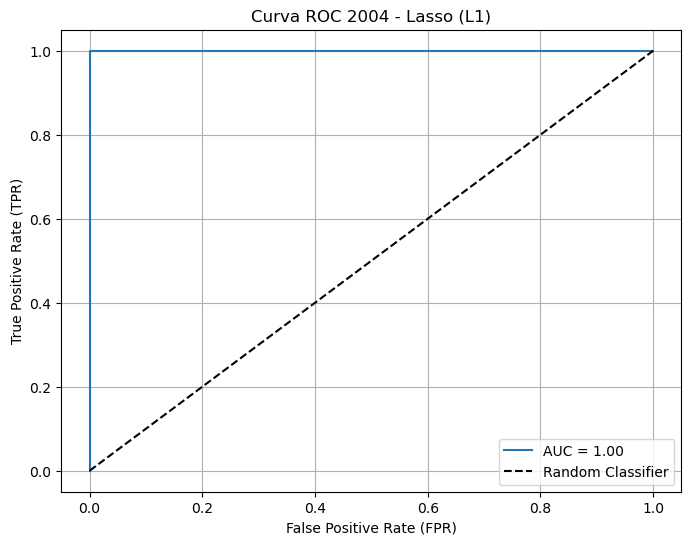

Curva ROC para 2004 - Ridge (L2):


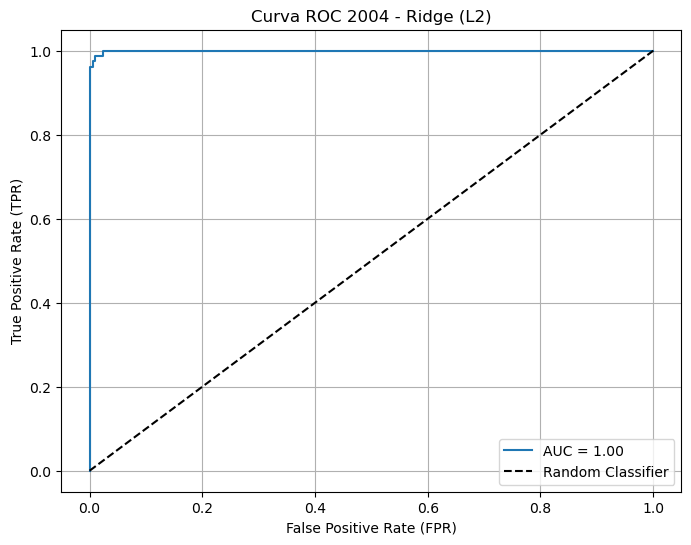

Curva ROC para 2024 - Lasso (L1):


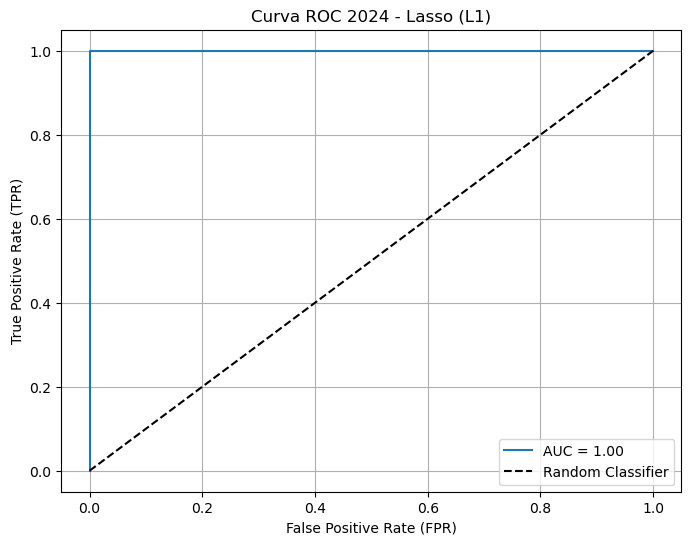

Curva ROC para 2024 - Ridge (L2):


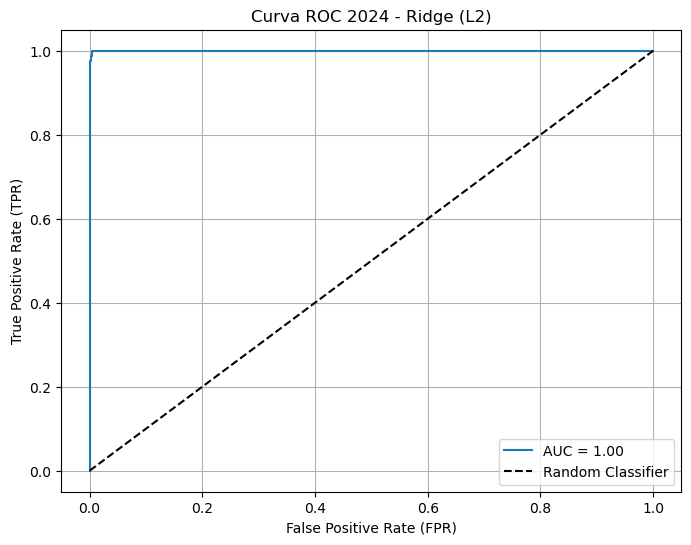

In [51]:
#modelos de Regresión Logística con penalizaciones L1 y L2

#AÑO 2004
logistic_l1_2004 = LogisticRegression(penalty='l1', solver='liblinear', C=1)  # Lasso
logistic_l2_2004 = LogisticRegression(penalty='l2', C=1)  # Ridge

logistic_l1_2004.fit(X_train_2004_std, y_train_2004)
logistic_l2_2004.fit(X_train_2004_std, y_train_2004)

#AÑO 2024
logistic_l1_2024 = LogisticRegression(penalty='l1', solver='liblinear', C=1)  # Lasso
logistic_l2_2024 = LogisticRegression(penalty='l2', C=1)  # Ridge

logistic_l1_2024.fit(X_train_2024_std, y_train_2024)
logistic_l2_2024.fit(X_train_2024_std, y_train_2024)

#función para graficar curvas ROC por separado
def plot_roc_curve(model, X_test, y_test, title):
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidad para clase positiva
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

#graficamos ROC para 2004
print("Curva ROC para 2004 - Lasso (L1):")
plot_roc_curve(logistic_l1_2004, X_test_2004_std, y_test_2004, "Curva ROC 2004 - Lasso (L1)")

print("Curva ROC para 2004 - Ridge (L2):")
plot_roc_curve(logistic_l2_2004, X_test_2004_std, y_test_2004, "Curva ROC 2004 - Ridge (L2)")

#graficamos ROC para 2024
print("Curva ROC para 2024 - Lasso (L1):")
plot_roc_curve(logistic_l1_2024, X_test_2024_std, y_test_2024, "Curva ROC 2024 - Lasso (L1)")

print("Curva ROC para 2024 - Ridge (L2):")
plot_roc_curve(logistic_l2_2024, X_test_2024_std, y_test_2024, "Curva ROC 2024 - Ridge (L2)")

#C0MPARAR CON REGRESION LOGISTICA DE TP3 EN EL INFORME

**Ejercicio 5**: Realicen un barrido en = 10n λ con n ∈ {−5, −4, −3 ..., +4, +5} y utilicen 10-fold CV para elegir el λ óptimo en regresión logística con Ridge y con LASSO. ¿Qué λ seleccionó en cada caso? Usando la librería de seaborn, generen box plot mostrando la distribución del error de predicción para cada λ. Cada box debe corresponder a un valor de λ y contener como observaciones el error medio de validación (MSE) para cada partición. Además, para la regularización LASSO, generen un line plot del promedio de la proporción de variables ignoradas por el modelo en función de λ (como vieron en el tutorial 10), es decir la proporción de variables para las cuales el coeficiente asociado es cero.2

In [53]:
#PARTE 1
#realizamos un barrido en = 10^n λ con n ∈ {−5, −4, −3 ..., +4, +5} y utilicen 10-fold CV para elegir el λ óptimo en regresión logística con Ridge y con LASSO. 

#definimos el rango de λ (C en scikit-learn es inversamente proporcional a λ: \( \lambda = 1 / C \))
param_grid = {'C': [10**n for n in range(-5, 6)]}  # \( n \in \{-5, ..., +5\} \)

In [55]:
#AÑO 2004

In [55]:
#ridge (L2) para 2004
ridge_logistic_2004 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
grid_search_ridge_2004 = GridSearchCV(ridge_logistic_2004, param_grid, cv=10, scoring='roc_auc')  # ROC-AUC como métrica

In [57]:
grid_search_ridge_2004.fit(X_train_2004_std, y_train_2004)
best_ridge_C_2004 = grid_search_ridge_2004.best_params_['C']

In [59]:
#LASSO (L1) para 2004
lasso_logistic_2004 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
grid_search_lasso_2004 = GridSearchCV(lasso_logistic_2004, param_grid, cv=10, scoring='roc_auc')  # ROC-AUC como métrica

In [61]:
grid_search_lasso_2004.fit(X_train_2004_std, y_train_2004)
best_lasso_C_2004 = grid_search_lasso_2004.best_params_['C']

In [ ]:
#AÑO 2024

In [63]:
#ridge (L2) para 2024
ridge_logistic_2024 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
grid_search_ridge_2024 = GridSearchCV(ridge_logistic_2024, param_grid, cv=10, scoring='roc_auc')  # ROC-AUC como métrica

In [65]:
grid_search_ridge_2024.fit(X_train_2024_std, y_train_2024)
best_ridge_C_2024 = grid_search_ridge_2024.best_params_['C']

In [67]:
#LASSO (L1) para 2024
lasso_logistic_2024 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
grid_search_lasso_2024 = GridSearchCV(lasso_logistic_2024, param_grid, cv=10, scoring='roc_auc')  # ROC-AUC como métrica

In [ ]:
grid_search_lasso_2024.fit(X_train_2024_std, y_train_2024)
best_lasso_C_2024 = grid_search_lasso_2024.best_params_['C']
#hola nacho, puede que este codigo no corra. nos aparece que esta cargando, no tira error pero tampoco corre. 

In [69]:
#imprimimos los mejores valores de λ para cada caso
print(f"Mejor λ (Ridge) para 2004: {1/best_ridge_C_2004}")
print(f"Mejor λ (LASSO) para 2004: {1/best_lasso_C_2004}")
print(f"Mejor λ (Ridge) para 2024: {1/best_ridge_C_2024}")
#print(f"Mejor λ (LASSO) para 2024: {1/best_lasso_C_2024}") #pusimos # porque el codigo de arriba no corria

Mejor λ (Ridge) para 2004: 0.01
Mejor λ (LASSO) para 2004: 0.001
Mejor λ (Ridge) para 2024: 0.01


In [71]:
#PARTE 2
#usando la librería de seaborn, generen box plot mostrando la distribución del error de predicción para cada λ. 
#cada box debe corresponder a un valor de λ y contener como observaciones el error medio de validación (MSE) para cada partición.

#configuracion de valores de λ (alpha)
alphas = [10**n for n in range(-5, 6)]  # Barrido de valores entre 10^-5 y 10^5
mse_scores = []  # Para almacenar los MSE

#calculo del MSE:
#iterar sobre cada valor de α
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    #validación cruzada (10-fold CV)
    scores = cross_val_score(ridge, X_train_2004_std, y_train_2004, #se usa cross_val_score para obtener los errores de validación (negativos), que son convertidos a positivos.
                             cv=10, scoring='neg_mean_squared_error')
    #guardamos resultados como MSE positivos
    mse_scores.extend([(-score, np.log10(alpha)) for score in scores])

#convertimos los resultados a un DataFrame
mse_df = pd.DataFrame(mse_scores, columns=['MSE', 'log10_lambda'])

/var/folders/c2/gtbjsyt14vqbtkzmxnc_htwr0000gn/T/ipykernel_53314/3345625704.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mse_df, x='log10_lambda', y='MSE', palette='Blues')


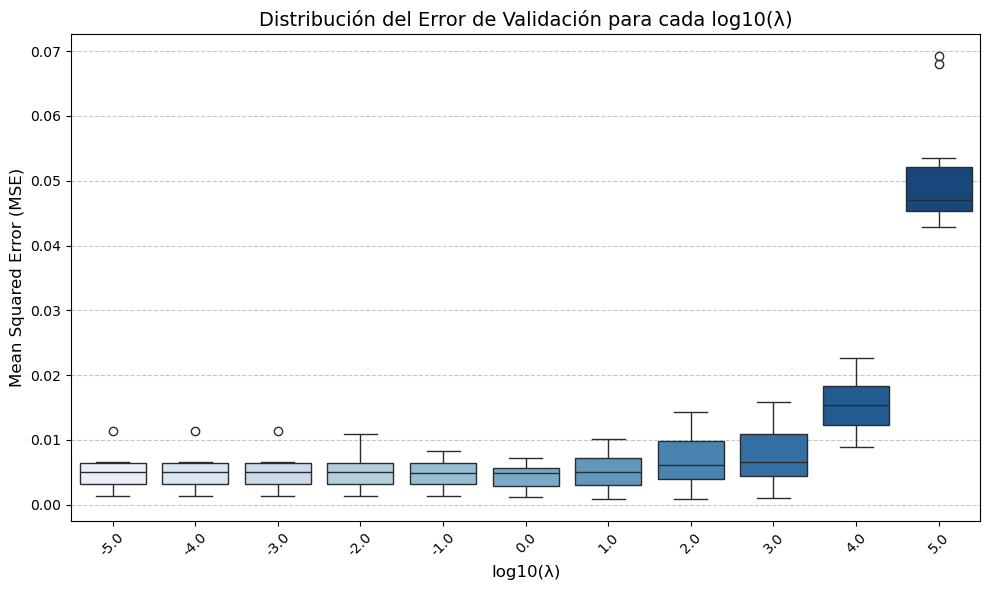

In [73]:
#creamos el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=mse_df, x='log10_lambda', y='MSE', palette='Blues')
plt.title('Distribución del Error de Validación para cada log10(λ)', fontsize=14)
plt.xlabel('log10(λ)', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#el gráfico muestra la dispersión del MSE para cada 𝜆 en escala logarítmica. 
#esto ayuda a identificar el rango de 𝜆 donde los errores son menores y más estables.


#ANALISIS RESULTADOS GRAFICO:
# - valores bajos de λ (menos regularización): En valores como log10(𝜆) = −5, −4 se observa un MSE bajo y estable (caja pequeña y mediana cerca del extremo inferior del eje Y).
#esto indica que el modelo se ajusta bien a los datos sin introducir un nivel de penalización significativo.
# - valores intermedios de λ:A medida que λ aumenta (log10(𝜆) = −2,−1,0 el MSE sigue siendo bajo, pero la dispersión puede aumentar.Estos valores de 
#λ suelen representar un equilibrio entre ajuste y regularización.
# - valores altos de λ (regularización fuerte): Para log10(𝜆)= 4,5, el MSE aumenta significativamente.
#esto ocurre porque una regularización fuerte penaliza demasiado los coeficientes del modelo, lo que genera un subajuste (underfitting).
#- mejor rango de λ: según el grafico, el rango óptimo de λ parece estar entre −2 ≤ log10(𝜆) ≤ 0, ya que aquí el MSE es más bajo y tiene menor variabilidad.

In [75]:
#PARTE 3
#para la regularización LASSO, generen un line plot del promedio de la proporción de variables ignoradas por el modelo en función de λ (como vieron en el tutorial 10), 
#es decir la proporción de variables para las cuales el coeficiente asociado es cero

#valores de λ (alpha) para el barrido
alphas = [10**n for n in range(-5, 6)]  # De 10^-5 a 10^5
proportion_zero_coefs = []  # Para almacenar la proporción de coeficientes cero

#iteramos sobre los valores de α
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_2004_std, y_train_2004)
    # Calcular proporción de coeficientes en cero
    num_zero_coefs = np.sum(lasso.coef_ == 0) #Contamos los coeficientes del modelo que son exactamente cero
    proportion_zero_coefs.append(num_zero_coefs / len(lasso.coef_)) #Dividimos el número de coeficientes cero por el total de coeficientes.

#creamos un DataFrame con los resultados
lasso_zero_df = pd.DataFrame({
    'log10_lambda': np.log10(alphas),
    'proportion_zero_coefs': proportion_zero_coefs
})

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.339e-01, tolerance: 1.631e-02
  model = cd_fast.enet_coordinate_descent(


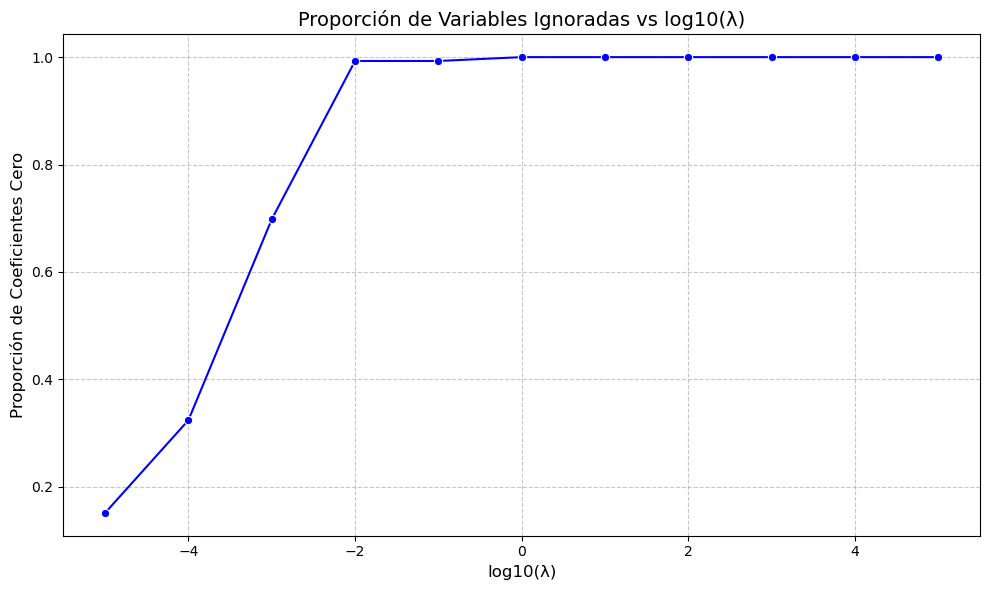

In [77]:
#generamos el line plot
#usamos un line plot para visualizar cómo la proporción de variables ignoradas cambia con log10(𝜆).
plt.figure(figsize=(10, 6))
sns.lineplot(data=lasso_zero_df, x='log10_lambda', y='proportion_zero_coefs', marker='o', color='blue')
plt.title('Proporción de Variables Ignoradas vs log10(λ)', fontsize=14)
plt.xlabel('log10(λ)', fontsize=12)
plt.ylabel('Proporción de Coeficientes Cero', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#el gráfico muestra cómo la regularización LASSO elimina variables al aumentar 𝜆
#a valores bajos de λ, pocos coeficientes son cero; a valores altos, la mayoría de las variables son ignoradas. 

#GRAFICO:
# - el gráfico demuestra cómo LASSO realiza la selección de variables de forma eficiente al incrementar 𝜆 Un valor de 𝜆 demasiado alto elimina demasiadas variables, 
# - reduciendo la capacidad predictiva del modelo. Sin embargo, un valor moderado de λ puede encontrar un balance adecuado entre simplicidad del modelo y desempeño.
#Para este caso, el punto óptimo estaría en el rango donde la proporción de coeficientes cero comienza a estabilizarse sin alcanzar el 100%, permitiendo seleccionar un conjunto relevante de predictores.

**Ejercicio 6:** En el caso del valor óptimo de λ para LASSO encontrado en el inciso anterior, ¿qué variables fueron descartadas? ¿Son las que hubieran esperado? ¿Tiene relación con lo que respondieron en el inciso 1 de la Parte I?

In [82]:
#definimos los valores óptimos de lambda para LASSO obtenidos del ejercicio previo
lambdas_lasso = {'2004': 1.0, '2024': 1.0}

#creamos un diccionario para almacenar resultados
resultados = {}

for year, lambda_opt in lambdas_lasso.items():
    #entrenamos LASSO para el año correspondiente
    lasso_model = Lasso(alpha=lambda_opt, max_iter=10000)
    
    #seleccionamos los datos correspondientes al año
    X_train = X_train_2004_std if year == '2004' else X_train_2024_std
    y_train = y_train_2004 if year == '2004' else y_train_2024
    
    #entrenamos el modelo
    lasso_model.fit(X_train, y_train)
    
    #obtenemos los coeficientes
    coeficientes = pd.DataFrame({
        'Variable': X_train.columns,  # Nombres de las variables
        'Coeficiente': lasso_model.coef_  # Coeficientes del modelo
    })
    
    #separamos variables descartadas y relevantes
    variables_descartadas = coeficientes[coeficientes['Coeficiente'] == 0]['Variable'].tolist()
    variables_relevantes = coeficientes[coeficientes['Coeficiente'] != 0]['Variable'].tolist()
    
    #guardar resultados en el diccionario
    resultados[year] = {
        'descartadas': variables_descartadas,
        'relevantes': variables_relevantes
    }

#imprimimos resultados
for year, res in resultados.items():
    print(f"\n--- Resultados para {year} ---")
    print(f"Variables descartadas (coeficientes = 0):\n{res['descartadas']}")
    print(f"Variables relevantes (coeficientes ≠ 0):\n{res['relevantes']}")


--- Resultados para 2004 ---
Variables descartadas (coeficientes = 0):
['Intercepto', 'codusu', 'nro_hogar', 'componente', 'h15', 'trimestre_x', 'region_x', 'aglomerado_x', 'pondera_x', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch15', 'ch16', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'p21', 'decocur', 'rdecocur', 'gdecocur', 'adecocur', 'tot_p12', 'p47t', 'decindr', 'rdecindr', 'gdecindr', 'adecindr', 'v2_m', 'v3_m', 'v4_m', 'v5_m', 'v8_m', 'v9_m', 'v10_m', 'v11_m', 'v12_m', 'v18_m', 'v19_am', 'v21_m', 't_vi', 'itf_x', 'decifr_x', 'rdecifr_x', 'gdecifr_x', 'adecifr_x', 'ipcf_x', 'deccfr_x', 'rdeccfr_x', 'gdeccfr_x', 'adeccfr_x', 'realizada', 'trimestre_y', 'region_y', 'aglomerado_y', 'pondera_y', 'iv1', 'iv2', 'iv3', 'iv4', 'iv5', 'iv6', 'iv7', 'iv8', 'iv9', 'iv10', 'iv11', 'iv12_1', 'iv12_2', 'iv12_3', 'ii1', 'ii2', 'ii3', 'ii3_1', 'ii4

In [84]:
#definimos los valores óptimos de lambda para cada año
lambdas_lasso = {'2004': 0.001, '2024': 1.0}

#creamos un diccionario para almacenar resultados
resultados = {}

for year, lambda_opt in lambdas_lasso.items():
    #entrenamos LASSO para el año correspondiente
    lasso_model = Lasso(alpha=lambda_opt, max_iter=10000)
    X_train = X_train_2004_std if year == '2004' else X_train_2024_std
    y_train = y_train_2004 if year == '2004' else y_train_2024
    lasso_model.fit(X_train, y_train)
    
    #obtenemos los coeficientes
    coeficientes = pd.DataFrame({
        'Variable': X_train.columns,  # Nombres de las variables
        'Coeficiente': lasso_model.coef_  # Coeficientes del modelo
    })
    
    #separamos variables descartadas y relevantes
    variables_descartadas = coeficientes[coeficientes['Coeficiente'] == 0]['Variable'].tolist()
    variables_relevantes = coeficientes[coeficientes['Coeficiente'] != 0]['Variable'].tolist()
    
    #guardamos resultados en el diccionario
    resultados[year] = {
        'descartadas': variables_descartadas,
        'relevantes': variables_relevantes
    }

#imprimimos resultados
for year, res in resultados.items():
    print(f"\n--- Resultados para {year} ---")
    print(f"Variables descartadas (coeficientes = 0):\n{res['descartadas']}")
    print(f"Variables relevantes (coeficientes ≠ 0):\n{res['relevantes']}")


--- Resultados para 2004 ---
Variables descartadas (coeficientes = 0):
['Intercepto', 'codusu', 'componente', 'trimestre_x', 'region_x', 'aglomerado_x', 'pondera_x', 'ch07', 'ch08', 'ch12', 'ch13', 'ch15', 'ch16', 'cat_ocup', 'pp02c1', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'p21', 'decocur', 'rdecocur', 'gdecocur', 'adecocur', 'tot_p12', 'p47t', 'rdecindr', 'gdecindr', 'v2_m', 'v3_m', 'v4_m', 'v8_m', 'v9_m', 'v10_m', 'v11_m', 'v18_m', 'v19_am', 'v21_m', 't_vi', 'itf_x', 'decifr_x', 'rdecifr_x', 'gdecifr_x', 'ipcf_x', 'deccfr_x', 'rdeccfr_x', 'gdeccfr_x', 'adeccfr_x', 'realizada', 'trimestre_y', 'region_y', 'aglomerado_y', 'iv1', 'iv2', 'iv3', 'iv4', 'iv5', 'iv6', 'iv7', 'iv8', 'iv11', 'iv12_1', 'iv12_3', 'ii2', 'ii3_1', 'ii4_1', 'ii4_3', 'ii5', 'ii6', 'ii6_1', 'ii7', 'ii8', 'ii9', 'v1', 'v21', 'v3', 'v5', 'v7', 'v8', 'v9', 'v10', 'v11', 'v13', 'v18', 'v19_a', 'v19_b', 'ix_tot', 'ix_men10', 'ix_mayeq10', 'itf_y', 'ipcf_y', 'vii1_1', 'vii2_1', 'vii2_3', 'vii2_4', 'ingreso_per

**Ejercicio 7:** Elijan alguno de los modelos de regresión logística donde hayan probado distintos parámetros de regularización y comenten: Compare los resultados de 2004 versus 2024, ¿qué método de regularización funcionó mejor: Ridge o LASSO? ¿LASSO hizo una selección distinta de predictores en 2004 versus 2024? Comenten mencionando el error cuadrático medio (MSE).

In [86]:
#entrenamos modelos Ridge y LASSO para 2004 y 2024

#Ridge 2004: 
ridge_logistic_2004 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, C=best_ridge_C_2004) #utilizando el λ óptimo (C=best_ridge_C_2004) obtenido en el ej 5
ridge_logistic_2004.fit(X_train_2004_std, y_train_2004)
y_pred_ridge_2004 = ridge_logistic_2004.predict(X_test_2004_std)
mse_ridge_2004 = mean_squared_error(y_test_2004, y_pred_ridge_2004)

#Lasso 2004
lasso_logistic_2004 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, C=best_lasso_C_2004) #utilizando el λ óptimo (C=best_lasso_C_2004) obtenido en el ej 5
lasso_logistic_2004.fit(X_train_2004_std, y_train_2004)
y_pred_lasso_2004 = lasso_logistic_2004.predict(X_test_2004_std)
mse_lasso_2004 = mean_squared_error(y_test_2004, y_pred_lasso_2004)

#Ridge 2024
ridge_logistic_2024 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, C=best_ridge_C_2024) #utilizando el λ óptimo (C=best_ridge_C_2024) obtenido en el ej 5
ridge_logistic_2024.fit(X_train_2024_std, y_train_2024)
y_pred_ridge_2024 = ridge_logistic_2024.predict(X_test_2024_std)
mse_ridge_2024 = mean_squared_error(y_test_2024, y_pred_ridge_2024)

#Lasso 2024
#lasso_logistic_2024 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, C=best_lasso_C_2024) #utilizando el λ óptimo (C=best_lasso_C_2024) obtenido en el ej 5
#lasso_logistic_2024.fit(X_train_2024_std, y_train_2024)
#y_pred_lasso_2024 = lasso_logistic_2024.predict(X_test_2024_std)
#mse_lasso_2024 = mean_squared_error(y_test_2024, y_pred_lasso_2024)

# Imprimir los resultados
print(f"MSE Ridge 2004: {mse_ridge_2004}")
print(f"MSE Lasso 2004: {mse_lasso_2004}")
print(f"MSE Ridge 2024: {mse_ridge_2024}")
#print(f"MSE Lasso 2024: {mse_lasso_2024}")


MSE Ridge 2004: 0.0029239766081871343
MSE Lasso 2004: 0.001949317738791423
MSE Ridge 2024: 0.0
